<a href="https://colab.research.google.com/github/nguyendoanquangnhat/CNN/blob/main/CNN_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from keras.utils import load_img,img_to_array
import numpy as np
from os import listdir
from numpy import asarray,save 
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pickle

money_folder='/content/drive/MyDrive/MONEY'
photos,labels=list(),list()

for file in listdir(money_folder):
   if file.endswith('.jpg'):
     output=0
     if file.startswith('5000'):
       output=1
     elif file.startswith('10000'):
       output=2
     elif file.startswith('20000'):
       output=3
     elif file.startswith('50k'):
       output=4
     elif file.startswith('100k'):
       output=5
     elif file.startswith('200k'):
       output=6   
     elif file.startswith('500k'):
      output=7
     photo=load_img(money_folder+'/'+file,target_size=(200,200))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('money_photos.npy',photos)
save('money_labels.npy',labels)

(70, 200, 200, 3) (70,)


In [49]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
file = open('pix.data', 'wb')
pickle.dump((photos,labels), file)
file.close()

def load_data():
    file = open('pix.data', 'rb')
    (photos, labels) = pickle.load(file)
    file.close()
    return photos, labels

X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

In [50]:
print(X_train.shape)
print(X_test.shape)

(56, 200, 200, 3)
(14, 200, 200, 3)


In [51]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses,models,Input
from numpy.ma.core import reshape

X_train= X_train.astype('float32')/255
X_test= X_test.astype('float32')/255

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                 

In [52]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (56, 200, 200, 3)
X_test: (14, 200, 200, 3)
y_train: (56, 7)
y_test: (14, 7)


In [53]:
batch_size=16
epochs=20   
classes=7

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
4/4 [==============================] - 34s 1s/step - loss: 9.6520 - accuracy: 0.1071
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 2.6675 - accuracy: 0.2321
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 2.0556 - accuracy: 0.3214
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 1.8491 - accuracy: 0.3214
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 1.6919 - accuracy: 0.4643
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 1.5764 - accuracy: 0.4286
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 1.4557 - accuracy: 0.3929
Epoch 8/20
4/4 [==============================] - 5s 1s/step - loss: 1.0866 - accuracy: 0.6786
Epoch 9/20
4/4 [==============================] - 7s 1s/step - loss: 1.4717 - accuracy: 0.4821
Epoch 10/20
4/4 [==============================] - 5s 1s/step - loss: 1.0623 - accuracy: 0.5714
Epoch 11/20
4/4 [==============================]

In [54]:
model.save("/content/drive/MyDrive/AI/cnn_money.h5")

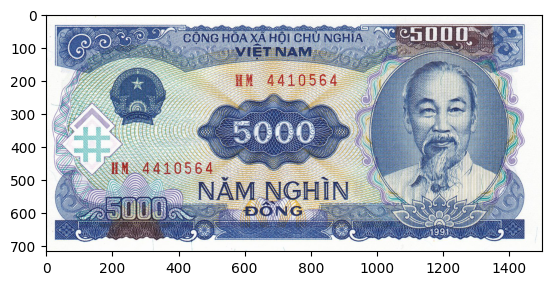

In [55]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model

model=load_model("/content/drive/MyDrive/AI/cnn_money.h5")
img=load_img('/content/drive/MyDrive/MONEY/5000vnd.5.jpg')
plt.imshow(img)
plt.show()

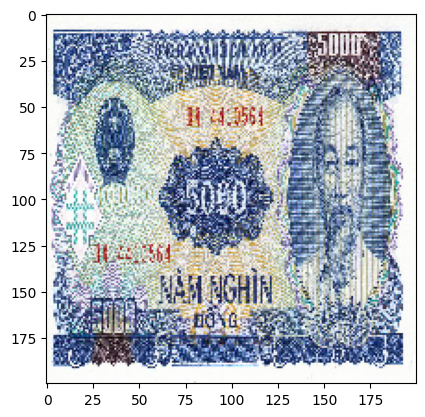

In [56]:
img=load_img('/content/drive/MyDrive/MONEY/5000vnd.5.jpg',target_size=(200,200))
plt.imshow(img)

In [58]:
class_name = ['5000vnd','10000vnd','20000vnd','50k','100k','200k','500k']
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255
predict=model.predict(img)
print("ĐÂY LÀ TỜ:", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 171ms/step
ĐÂY LÀ TỜ: 5000vnd [1.0000000e+00 2.9353830e-33 9.6163333e-13 0.0000000e+00 1.3417501e-32
 1.2701273e-29 9.2856677e-33]
1.0


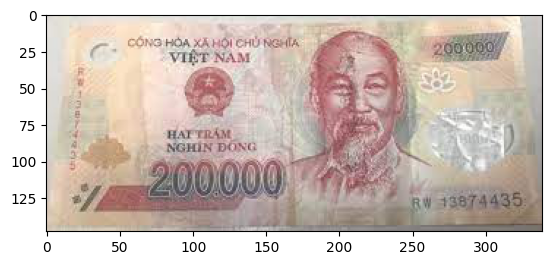

1/1 [==============================] - 0s 55ms/step
ĐÂY LÀ TỜ: 200k [2.0285904e-09 1.8274981e-04 4.3557574e-07 2.2569687e-04 2.8877435e-05
 9.9943727e-01 1.2500699e-04]
0.9994373


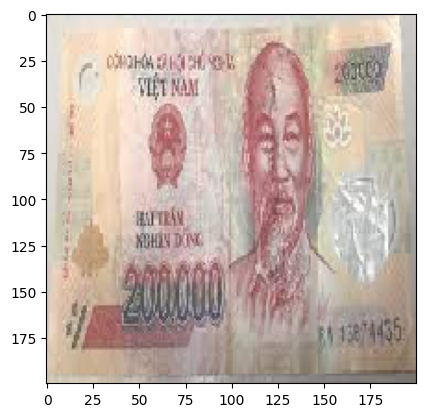

In [60]:
img1=load_img('/content/drive/MyDrive/MONEY/200k.3.jpg')
plt.imshow(img1)
plt.show()

img1=load_img('/content/drive/MyDrive/MONEY/200k.3.jpg',target_size=(200,200))
plt.imshow(img1)

img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("ĐÂY LÀ TỜ:", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))